# Chapter 5 Coastal Engineering: Vertical Structures Using Minikin Method

1. [Introduction](#1.-Introduction)
2. [Simulation](#2.-Simulation)
3. [Self-Assessment](#3.-Self-Assessment) 

## 1. Introduction

### Wave Load Calculation on Vertical Structures Using Minikin Method

This guide outlines the steps for calculating wave forces from **breaking waves** on vertical coastal structures using the **Minikin method**, with corrections and clarifications for three structural configurations.

---

### Assumptions
- Linear Wave Theory applies unless otherwise specified.
- Figures referenced (e.g., 7-3, 7-4, etc.) are from standard coastal engineering design manuals (e.g., Shore Protection Manual or Coastal Engineering Manual).
- `w` = unit weight of water  
- `ds` = water depth at structure  
- `T` = wave period  
- `Ho` = deepwater wave height  
- `Hb` = breaking wave height  
- `Rm` = dynamic force  
- `rm` = force reduction factor  
- `θ` = angle of inclination from vertical

---

### Non-Overtopping Vertical Structure

### Step-by-Step Procedure

1. **Wave Characteristics**
   - Calculate wavelength and deepwater wave height (`Ho`) using **Linear Wave Theory** if not provided.

2. **Design Breaking Wave Height**
   - Compute dimensionless parameter:  
     $$
     \frac{ds}{gT^2}
     $$
   - Use **Figure 7-4** to find **design breaking wave height** (`Hb`) at the structure.

3. **Available Breaking Wave Height**
   - Compute:  
     $$
     \frac{Ho}{gT^2}
     $$
   - Use **Figure 7-3** to find **available breaking wave height**.

4. **Applicability Check**
   - Confirm that **breaking wave theory** is valid for the given conditions.

5. **Pressure Ratio**
   - Use  
     $$
     \frac{ds}{gT^2}
     $$
     to obtain **pressure ratio** from **Figure 7-100**.

6. **Dynamic Pressure**
   - Multiply pressure ratio by unit weight (`w`) and design breaking wave height (`Hb`):  
     $$
     P = \text{ratio} \times w \times Hb
     $$

7. **Dynamic Force**
   - Compute:  
     $$
     Rm = P \times \frac{Hb}{3}
     $$

8. **Dynamic Moment**
   - Compute:  
     $$
     M_m = Rm \times ds
     $$

9. **Total Force**
   - Add dynamic force to static force:  
     $$
     F_{\text{total}} = Rm + \frac{w(ds + \frac{1}{2}Hb)^2}{2}
     $$

10. **Total Moment**
    - Add dynamic moment to static moment:  
      $$
      M_{\text{total}} = M_m + \frac{w(ds + \frac{1}{2}Hb)^3}{6}
      $$

---

### 2️⃣ Overtopping Vertical Structure

### Step-by-Step Procedure

1–4. **Repeat Steps 1–4** from the non-overtopping case.

5. **Force Reduction Factor**
   - Use **Figure 7-102** to obtain **force reduction factor** (`rm`).

6. **Reduced Dynamic Force**
   - Multiply dynamic force (`Rm`) by reduction factor:  
     $$
     Rm_{\text{reduced}} = rm \times Rm
     $$

7. **Reduced Moment**
   - Use **Figure 7-103** to obtain parameter `a`, then compute:  
     $$
     M'_m = ds \cdot Rm - (ds + a)(1 - rm) \cdot Rm
     $$

8. **Total Wave Loading**
   - Add dynamic wave loadings to hydrostatic components.

---

### 3️⃣ Slightly Inclined Non-Overtopping Vertical Structure

### Step-by-Step Procedure

1–8. **Repeat Steps 1–8** from the non-overtopping case.

9. **Reduced Dynamic Force**
   - Apply inclination correction:  
     $$$$
     Rm_{\text{inclined}} = Rm \cdot \sin^2(\theta)
   $$\]

10. **Reduced Dynamic Moment**
    - Apply inclination correction:  
    $$\[
      M_m^{\text{inclined}} = M_m \cdot \sin^2(\theta)
    $$\]

11. **Total Wave Loading**
    - Add dynamic wave loadings to hydrostatic components.

---

### ✅ Notes and Corrections

- Ensure consistent units (e.g., SI or Imperial) throughout.
- Use appropriate figures from validated coastal engineering references.
- For inclined structures, angle `θ` should be measured from vertical.
- Always verify applicability of breaking wave theory based on wave steepness and depth.


## 2. Simulation

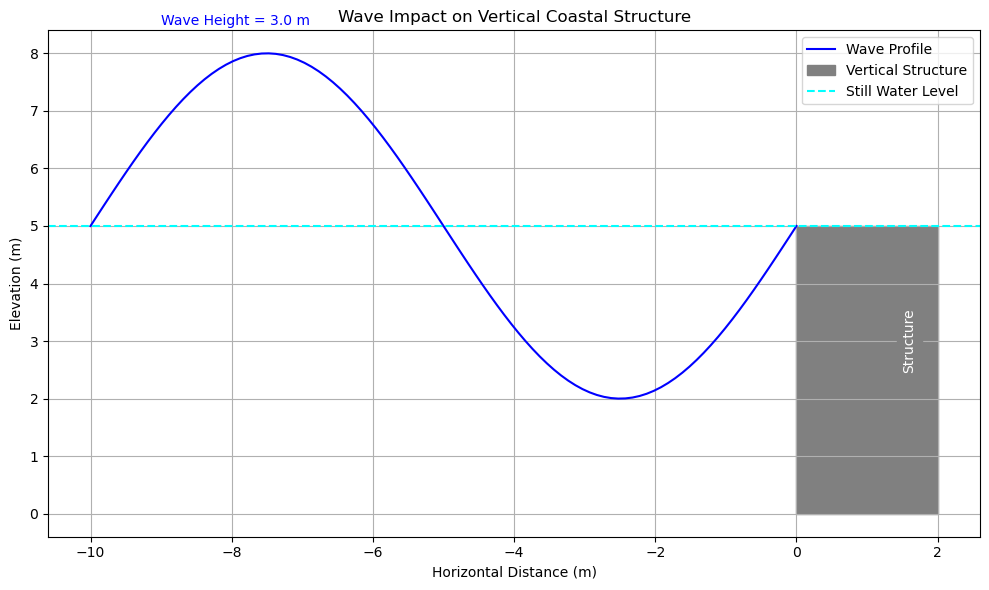

🔹 Minikin Method:
  Max Pressure: 12944.16 Pa
  Resultant Force: 12944.16 N/m
  Overturning Moment: 64720.81 Nm/m

🔹 Goda Method:
  Max Pressure p1: 5782.41 Pa
  Reduced Pressure p3: -1227.75 Pa
  Resultant Force: 5782.41 N/m
  Overturning Moment: 28912.03 Nm/m


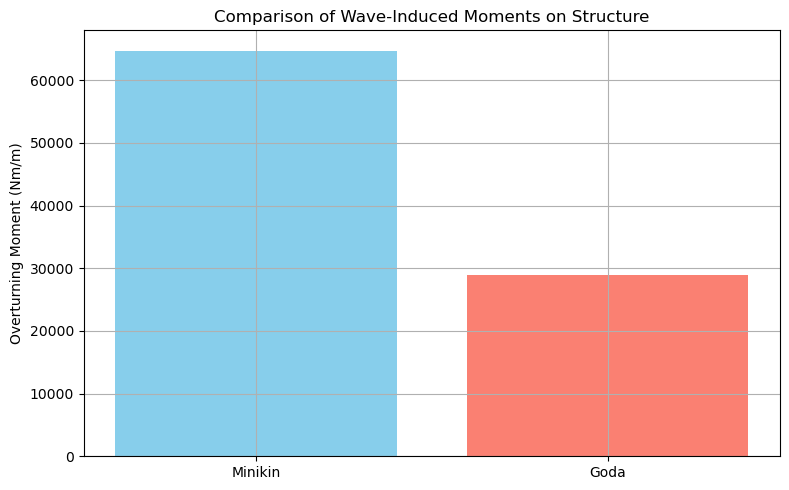

In [1]:
# 🌊 Wave Pressure & Moment Estimation using Minikin and Goda Methods

import numpy as np
import matplotlib.pyplot as plt

# 📐 Physical constants
g = 9.81          # gravity (m/s²)
gamma = 1025      # unit weight of seawater (kg/m³)
# 🌊 Wave parameters
#Hb=input("breakwer wave height")
#ds=input("water depth at toe")
#structure_height = input("height of structure")#8.0  # total height of structure (m)
#structure_width = input("width of structure")2#.0   # width of structure (m)

Hb = 3.0      # breaker wave height (m)
ds = 5.0      # water depth at toe (m)
structure_height = 5.0  # total height of structure (m)
structure_width = 2.0   # width of structure (m)
T = 8.0           # wave period (s)
slope = 0.02      # beach slope (tan β)

# 📊 Input parameters
#Hb = 3.0          # breaker wave height (m)
#ds = 5.0          # water depth at toe (m)
#d1 = 6.0          # depth one wavelength in front of wall (m)
#Ld1 = 20.0        # wavelength at d1 (m)
beta_deg = 0      # wave angle (degrees)
beta = np.radians(beta_deg)

# 📐 Airy wave theory: dispersion relation solver
def calculate_wavelength(T, h, tol=1e-6, max_iter=100):
    omega = 2 * np.pi / T
    k = omega**2 / g  # initial guess
    for _ in range(max_iter):
        k_new = omega**2 / (g * np.tanh(k * h))
        if abs(k_new - k) < tol:
            break
        k = k_new
    return 2 * np.pi / k

# 📏 Calculate wavelength at depth ds
Ld1 = calculate_wavelength(T, ds)

# 📏 Estimate depth one wavelength in front of structure
d1 = ds +slope * Ld1
d1 = max(d1, 0.1)  # prevent negative or zero depth

# 📐 Structure coordinates
wall_x = [0, 0, structure_width, structure_width, 0]
wall_y = [0, structure_height, structure_height, 0, 0]

# 🌊 Wave crest and trough
wave_x = np.linspace(-10, 0, 100)
wave_y = Hb * np.sin(2 * np.pi * wave_x / 10) + ds

# 🖼️ Plot setup
plt.figure(figsize=(10, 6))
plt.plot(wave_x, wave_y, label='Wave Profile', color='blue')
plt.fill(wall_x, wall_y, color='gray', label='Vertical Structure')
plt.axhline(ds, color='cyan', linestyle='--', label='Still Water Level')

# 📏 Annotations
plt.text(-9, ds + Hb + 0.5, f'Wave Height = {Hb} m', color='blue')
plt.text(1.5, structure_height / 2, 'Structure', rotation=90, color='white', backgroundcolor='gray')

# 🧭 Labels and legend
plt.xlabel('Horizontal Distance (m)')
plt.ylabel('Elevation (m)')
plt.title('Wave Impact on Vertical Coastal Structure')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# 📦 Minikin Method
pm_minikin = 101 * gamma * Hb / ds * (d1 + ds) / Ld1
Rm_minikin = pm_minikin * Hb / 3
Mm_minikin = Rm_minikin * ds

# 📦 Goda Method (simplified)
alpha1 = 0.6 + 2 / np.sinh(4 * np.pi * ds / Ld1)
alpha2 = min((ds - d1) / (3 * ds), 2 * ds / Hb)
alpha3 = 1 - d1 / ds

Hmax = Hb  # assuming design wave height equals breaker height
p1 = gamma * (1 + np.cos(beta)) * (alpha1 + alpha2 * np.cos(beta)**2) * Hmax / 2
p3 = alpha3 * p1

# Resultant force and moment (Goda)
Rm_goda = p1 * Hb / 3
Mm_goda = Rm_goda * ds

# 🧮 Print results
print("🔹 Minikin Method:")
print(f"  Max Pressure: {pm_minikin:.2f} Pa")
print(f"  Resultant Force: {Rm_minikin:.2f} N/m")
print(f"  Overturning Moment: {Mm_minikin:.2f} Nm/m")

print("\n🔹 Goda Method:")
print(f"  Max Pressure p1: {p1:.2f} Pa")
print(f"  Reduced Pressure p3: {p3:.2f} Pa")
print(f"  Resultant Force: {Rm_goda:.2f} N/m")
print(f"  Overturning Moment: {Mm_goda:.2f} Nm/m")

# 📈 Visualization
methods = ['Minikin', 'Goda']
moments = [Mm_minikin, Mm_goda]

plt.figure(figsize=(8, 5))
plt.bar(methods, moments, color=['skyblue', 'salmon'])
plt.ylabel('Overturning Moment (Nm/m)')
plt.title('Comparison of Wave-Induced Moments on Structure')
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

# 🌊 Step 1: Collect user inputs
try:
    structure_slope = float(input("Enter structure slope (e.g., 0.2 for 1V:5H): "))
    structure_height = float(input("Enter structure height in meters (e.g., 3.5): "))
    wave_height = float(input("Enter offshore significant wave height Hs (m): "))
    wave_period = float(input("Enter wave period T (s): "))
    beach_slope = float(input("Enter beach slope tan(β) (e.g., 0.1): "))
except ValueError:
    print("Invalid input. Please enter numbers only.")
    exit()

# 🌊 Step 2: Wave breaking depth estimate
g = 9.81  # gravity
Lo = (g * wave_period**2) / (2 * np.pi)
Hb = 0.78 * wave_height  # empirical breaking height
db = Hb / beach_slope    # breaking depth
print(f"\n📏 Estimated breaking depth: {db:.2f} m")

# 🌊 Step 3: Empirical wave celerity and energy flux
Cg = np.sqrt(g * db)     # shallow water wave celerity
Ef = (1/8) * 1025 * g * wave_height**2 * Cg  # wave energy flux

# 🌊 Step 4: Transport potential near structure (simplified)
theta = np.arctan(structure_slope)
Qs_structure = 0.77 * Ef * np.sin(2 * theta)
print(f"\n🚢 Estimated longshore transport near structure: {Qs_structure:.2f} W/m (proxy for sediment flux)")

# 🌊 Step 5: Reflective output
print("\n🧭 Interpretation:")
if Qs_structure > 0:
    print("→ Sediment is likely to drift downdrift (alongshore) from the structure due to oblique wave incidence.")
else:
    print("→ Minimal transport expected in this orientation. Consider reevaluating wave angle or structure alignment.")


Enter structure slope (e.g., 0.2 for 1V:5H):  0.2
Enter structure height in meters (e.g., 3.5):  10
Enter offshore significant wave height Hs (m):  2
Enter wave period T (s):  10
Enter beach slope tan(β) (e.g., 0.1):  0.1



📏 Estimated breaking depth: 15.60 m

🚢 Estimated longshore transport near structure: 18419.47 W/m (proxy for sediment flux)

🧭 Interpretation:
→ Sediment is likely to drift downdrift (alongshore) from the structure due to oblique wave incidence.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# 📐 Physical constants
g = 9.81            # gravity (m/s²)
gamma = 1025        # unit weight of seawater (kg/m³)
rho = 1025          # density of seawater (kg/m³)

# 📐 Airy wave theory: dispersion relation solver
def calculate_wavelength(T, h, tol=1e-6, max_iter=100):
    omega = 2 * np.pi / T
    k = omega**2 / g  # initial guess
    for _ in range(max_iter):
        k_new = omega**2 / (g * np.tanh(k * h))
        if abs(k_new - k) < tol:
            break
        k = k_new
    return 2 * np.pi / k

# 🧮 Main function
def wave_force_model(Hb, ds, structure_height, structure_width, T, slope, wall_angle_deg, wave_angle_deg):
    beta = np.radians(wave_angle_deg)
    theta = np.radians(wall_angle_deg)

    # Wavelength and depth calculations
    Ld1 = calculate_wavelength(T, ds)
    d1 = ds + slope * Ld1
    d1 = max(d1, 0.1)

    # 🌊 Minikin Method with wall angle correction
    pm_minikin = 101 * gamma * Hb / ds * (d1 + ds) / Ld1
    R_theta = np.cos(theta)  # wall angle correction
    pm_minikin_corr = pm_minikin * R_theta
    Rm_minikin = pm_minikin_corr * Hb / 3
    Mm_minikin = Rm_minikin * ds

    # 🌊 Goda Method with wave angle and overtopping correction
    alpha1 = 0.6 + 2 / np.sinh(4 * np.pi * ds / Ld1)
    alpha2 = min((ds - d1) / (3 * ds), 2 * ds / Hb)
    alpha3 = 1 - d1 / ds

    Hmax = Hb
    p1 = gamma * (1 + np.cos(beta)) * (alpha1 + alpha2 * np.cos(beta)**2) * Hmax / 2
    p3 = alpha3 * p1

    # Overtopping correction
    if Hb > structure_height:
        lambda_overtop = 0.5  # assume smooth foreshore
        c = np.sqrt(g * ds)
        p1 *= lambda_overtop

    Rm_goda = p1 * Hb / 3
    Mm_goda = Rm_goda * ds

    # 🖼️ Plot wave and structure
    wall_x = [0, 0, structure_width, structure_width, 0]
    wall_y = [0, structure_height, structure_height, 0, 0]
    wave_x = np.linspace(-10, 0, 100)
    wave_y = Hb * np.sin(2 * np.pi * wave_x / 10) + ds

    plt.figure(figsize=(10, 6))
    plt.plot(wave_x, wave_y, label='Wave Profile', color='blue')
    plt.fill(wall_x, wall_y, color='gray', label='Structure')
    plt.axhline(ds, color='cyan', linestyle='--', label='Still Water Level')
    plt.text(-9, ds + Hb + 0.5, f'Wave Height = {Hb:.1f} m', color='blue')
    plt.text(1.5, structure_height / 2, 'Structure', rotation=90, color='white', backgroundcolor='gray')
    plt.xlabel('Horizontal Distance (m)')
    plt.ylabel('Elevation (m)')
    plt.title('Wave Impact on Coastal Structure')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 📊 Print results
    print("🔹 Minikin Method (Corrected):")
    print(f"  Max Pressure: {pm_minikin_corr:.2f} Pa")
    print(f"  Resultant Force: {Rm_minikin:.2f} N/m")
    print(f"  Overturning Moment: {Mm_minikin:.2f} Nm/m")

    print("\n🔹 Goda Method (Corrected):")
    print(f"  Max Pressure p1: {p1:.2f} Pa")
    print(f"  Reduced Pressure p3: {p3:.2f} Pa")
    print(f"  Resultant Force: {Rm_goda:.2f} N/m")
    print(f"  Overturning Moment: {Mm_goda:.2f} Nm/m")

    # 📈 Comparison bar chart
    methods = ['Minikin', 'Goda']
    moments = [Mm_minikin, Mm_goda]
    plt.figure(figsize=(8, 5))
    plt.bar(methods, moments, color=['skyblue', 'salmon'])
    plt.ylabel('Overturning Moment (Nm/m)')
    plt.title('Comparison of Wave-Induced Moments')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 🎛️ Interactive sliders
interact(
    wave_force_model,
    Hb=FloatSlider(value=3.0, min=1.0, max=6.0, step=0.1, description='Breaker Height Hb (m)'),
    ds=FloatSlider(value=5.0, min=1.0, max=10.0, step=0.1, description='Depth at Toe ds (m)'),
    structure_height=FloatSlider(value=5.0, min=2.0, max=10.0, step=0.1, description='Structure Height (m)'),
    structure_width=FloatSlider(value=2.0, min=1.0, max=5.0, step=0.1, description='Structure Width (m)'),
    T=FloatSlider(value=8.0, min=4.0, max=12.0, step=0.5, description='Wave Period T (s)'),
    slope=FloatSlider(value=0.02, min=0.005, max=0.05, step=0.005, description='Beach Slope'),
    wall_angle_deg=FloatSlider(value=0, min=0, max=30, step=1, description='Wall Angle (°)'),
    wave_angle_deg=FloatSlider(value=0, min=0, max=45, step=1, description='Wave Angle (°)')
);

interactive(children=(FloatSlider(value=3.0, description='Breaker Height Hb (m)', max=6.0, min=1.0), FloatSlid…

## 3 Self-Assessment

### 📘 Conceptual Questions

- What physical processes are captured by the Airy wave theory used in the `calculate_wavelength` function?
- Why is the dispersion relation nonlinear, and how does the iterative solver address this?
- How does wave period $( T $) influence wavelength $( L $), and what implications does this have for wave loading?

### Force Estimation Methods
- What are the key assumptions behind the Minikin method for estimating wave pressure and force?
- How does the Goda method incorporate wave angle and overtopping effects that the Minikin method does not?
- Why is wall angle correction applied in the Minikin method but not explicitly in the Goda method?

### Structural Interaction
- How does the depth at the toe $( d_s $) affect the magnitude of wave-induced forces and moments?
- What role does the structure height play in determining overtopping and pressure distribution?
- Why is the overturning moment a critical metric for structural stability?

---

### Reflective Questions

- In what coastal scenarios might the Minikin method be more appropriate than the Goda method, and vice versa?
- How would the results change if the structure were submerged or if the wave height exceeded the structure height significantly?
- What are the limitations of using linear wave theory (Airy) in this context, especially for high-energy wave events?
- How could this model be extended to include dynamic wave loading or time-varying wave trains?
- What are the implications of assuming a constant seawater density and unit weight across all scenarios?

---

### ❓ Quiz Questions

### Multiple Choice

1. **Which parameter most directly affects the wavelength in the dispersion relation?**  
   A. Breaker height $( H_b $)  
   B. Wave period $( T $)  
   C. Structure width  
   D. Wall angle  
   **Answer:** B

2. **In the Goda method, which factor reduces the pressure due to overtopping?**  
   A. Wall angle  
   B. Beach slope  
   C. $( \lambda_{\text{overtop}} $)  
   D. Structure width  
   **Answer:** C

3. **The Minikin method calculates pressure using which of the following expressions?**  
   A. $( \gamma H_b / ds \cdot (d_1 + ds)/L $)  
   B. $( \rho g H_b^2 / L $)  
   C. $( \gamma H_b \cdot \cos(\theta) $)  
   D. $( \gamma H_b / L \cdot \tan(\beta) $)  
   **Answer:** A

### True/False

4. **The Goda method accounts for wave angle effects using cosine terms.**  
   **Answer:** True

5. **The Minikin method includes overtopping correction by default.**  
   **Answer:** False

6. **Increasing the wall angle reduces the resultant force in the Minikin method.**  
   **Answer:** True

### Short Answer

7. **Explain why the overturning moment is calculated as force × depth. What does this represent physically?**  
   *Answer:* It represents the torque exerted by wave forces about the base of the structure, which influences its rotational stability.

8. **How does increasing the beach slope affect the effective depth $( d_1 $) and wave loading?**  
   *Answer:* A steeper slope increases $( d_1 $), which can reduce wave steepness and alter pressure distribution.
